# Geospatial Python
## Read and visualize raster data
Setup: https://carpentries-incubator.github.io/geospatial-python/index.html

Instruction: https://carpentries-incubator.github.io/geospatial-python/06-raster-intro.html

Objectives:
* Explore raster attributes and metadata using Python.
* Read rasters into Python using the rioxarray package.
* Visualize single/multi-band raster data.

In [1]:
# first import necessary libraries
import pystac # to load rasters from the search result (previous class)
import rioxarray # to open and download remote raster data

In [2]:
#load previously saved Sentinel-2 image metadata
items = pystac.ItemCollection.from_file("search.json")
items

In [3]:
#open the first item (band 9 in Amsterdam) #nir09 (central wavelength 945 nm)
raster_ams_b9 = rioxarray.open_rasterio(items[0].assets["nir09"].href) 
# view the shape and attributes of the data
print(raster_ams_b9)
raster_ams_b9

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [4]:
# access band attributes using .rio accessor
print(raster_ams_b9.rio.crs)
print(raster_ams_b9.rio.nodata)
print(raster_ams_b9.rio.bounds()) #method
print(raster_ams_b9.rio.width)
print(raster_ams_b9.rio.height)

EPSG:32631
0
(600000.0, 5790240.0, 709800.0, 5900040.0)
1830
1830


## Visualize a Raster

In [5]:
# examine the array
raster_ams_b9.values

array([[[    0,     0,     0, ..., 10061, 10200, 10172],
        [    0,     0,     0, ..., 10424, 10315,  9763],
        [    0,     0,     0, ..., 10328, 10648, 10405],
        ...,
        [    0,     0,     0, ...,  4298,  4343,  4315],
        [    0,     0,     0, ...,  4284,  4284,  4155],
        [    0,     0,     0, ...,  3935,  3545,  3958]]], dtype=uint16)

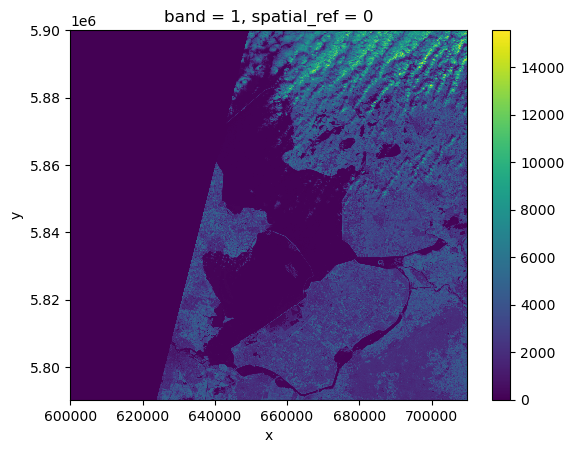

In [6]:
# show a basic plot
raster_ams_b9.plot()

Note: The nir09 band with the central wavelength of 945nm is sensitive to water vapor
https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-2-msi/msi-instrument

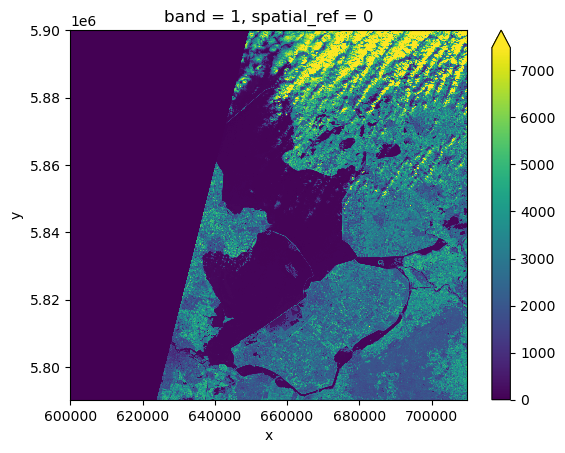

In [7]:
# cloudy pixels at the top of the image have high reflectance values, while the contrast of everything else is quite low.
# use robust=True, which displays values between the 2nd and 98th percentile
raster_ams_b9.plot(robust=True)

# or manually set range raster_ams_b9.plot(vmin=100, vmax=7000)

In [8]:
# View the Raster Coordinate Reference System
print(raster_ams_b9.rio.crs)

EPSG:32631


In [9]:
# or the EPSG code number as an int
raster_ams_b9.rio.crs.to_epsg()

32631

In [10]:
# Use pyproj to see more metadata about the CRS
from pyproj import CRS
epsg = raster_ams_b9.rio.crs.to_epsg()
crs = CRS(epsg)
crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
#  show the geographic bounds that the CRS is intended to be used
crs.area_of_use

AreaOfUse(west=0.0, south=0.0, east=6.0, north=84.0, name='Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.')

In [12]:
#help(crs)

In [13]:
#dir(crs) # dir returns all properties and methods of the specified object

In [14]:
# to get the units of our data
print(crs.axis_info)
print(raster_ams_b9.rio.crs.linear_units)

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre), Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]
metre


Calculate Raster Statistics

In [15]:

raster_ams_b9.min().spatial_ref

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int64 0
Attributes: (12/18)
    crs_wkt:                           PROJCS["WGS 84 / UTM zone 31N",GEOGCS[...
    semi_major_axis:                   6378137.0
    semi_minor_axis:                   6356752.314245179
    inverse_flattening:                298.257223563
    reference_ellipsoid_name:          WGS 84
    longitude_of_prime_meridian:       0.0
    ...                                ...
    longitude_of_central_meridian:     3.0
    false_easting:                     500000.0
    false_northing:                    0.0
    scale_factor_at_central_meridian:  0.9996
    spatial_ref:                       PROJCS["WGS 84 / UTM zone 31N",GEOGCS[...
    GeoTransform:                      600000.0 60.0 0.0 5900040.0 0.0 -60.0

In [16]:
print(raster_ams_b9.min())
print(raster_ams_b9.max())
print(raster_ams_b9.mean())
print(raster_ams_b9.std())

<xarray.DataArray ()>
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(15558, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(1649.83763385)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2053.77598092)
Coordinates:
    spatial_ref  int64 0


In [17]:
#  to see specific quantiles
print(raster_ams_b9.quantile([0.25, 0.75]))

<xarray.DataArray (quantile: 2)>
array([   0., 2919.])
Coordinates:
  * quantile  (quantile) float64 0.25 0.75


In [18]:
# do above with numpy
import numpy
print(numpy.percentile(raster_ams_b9, 25))
print(numpy.percentile(raster_ams_b9, 75))

0.0
2919.0


In [19]:
# specific help
#help(raster_ams_b9.quantile)

## Dealing with Missing Data

In [20]:
# masking missing data
raster_ams_b9 = rioxarray.open_rasterio(items[0].assets["nir09"].href, masked=True)

# or using where 
raster_ams_b9.where(raster_ams_b9!=raster_ams_b9.rio.nodata)

# note: this changes the data type of DataArray from integers to float

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[   nan,    nan,    nan, ..., 10061., 10200., 10172.],
        [   nan,    nan,    nan, ..., 10424., 10315.,  9763.],
        [   nan,    nan,    nan, ..., 10328., 10648., 10405.],
        ...,
        [   nan,    nan,    nan, ...,  4298.,  4343.,  4315.],
        [   nan,    nan,    nan, ...,  4284.,  4284.,  4155.],
        [   nan,    nan,    nan, ...,  3935.,  3545.,  3958.]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [21]:
print(raster_ams_b9.min())
print(raster_ams_b9.max())
print(raster_ams_b9.mean())
print(raster_ams_b9.std())

<xarray.DataArray ()>
array(1., dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(15558., dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2475.8188, dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2069.959, dtype=float32)
Coordinates:
    spatial_ref  int64 0


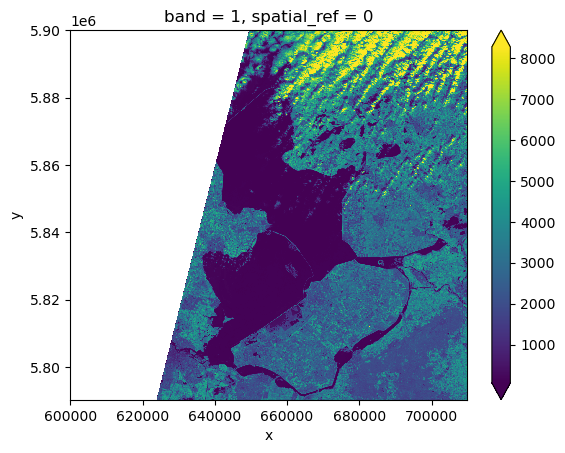

In [22]:
#Note: nodata pixels are not shown anymore
raster_ams_b9.plot(robust=True)

## Mulitband Raster

In [23]:
#load overview asset for the Sentinel-2 scene
raster_ams_overview = rioxarray.open_rasterio(items[0].assets['visual'].href, overview_level=3)
raster_ams_overview

<xarray.DataArray (band: 3, y: 687, x: 687)>
[1415907 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6.001e+05 6.002e+05 ... 7.096e+05 7.097e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [24]:
# check the shape
raster_ams_overview.shape

(3, 687, 687)

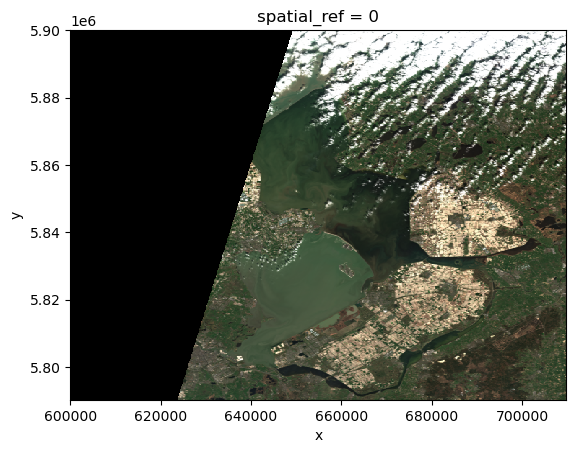

In [25]:
# visualize the multi-band data
raster_ams_overview.plot.imshow()

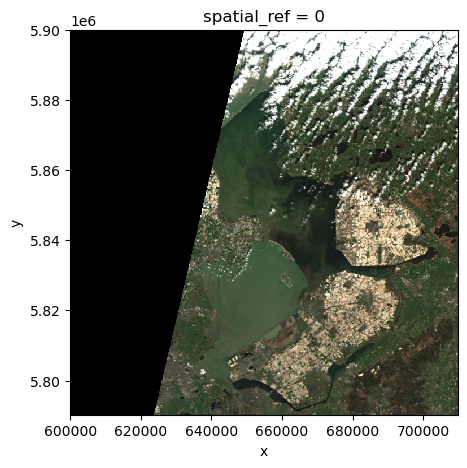

In [26]:
# fix the aspect ratio
raster_ams_overview.plot.imshow(size=5, aspect=1)

#note: height/width ratio is 1:1 (check the rio.height and rio.width) and size required with aspect property set to 1